### Tutorials_scCAMEL-SWAPLINE_mouseDentateGyrus_humanGlioblastoma

**Original Article:** [Neural network learning defines glioblastoma features to be of neural crest perivascular or radial glia lineages,"Sci. Adv.", 2022 ](https://pubmed.ncbi.nlm.nih.gov/35675414/)

**Package:** [scCAMEL-SWAPLINE.v1](https://pubmed.ncbi.nlm.nih.gov/35675414/)

**Author:** [Yizhou Hu](https://staff.ki.se/people/yizhou-hu), **Research Group:** [Ernfors lab](https://ki.se/en/mbb/patrik-ernfors-group)

**Link of the datasets:** [Mouse Dentate Gyrus, Human glioblastoma](https://1drv.ms/f/s!AoNAwG-G6IN7mMI4FuP_jm_z7GQvwg?e=kCda72), **Dataset references:** [Hochgerner and Zeisel, et al.](https://pubmed.ncbi.nlm.nih.gov/29335606/), [Couturier, et al.](https://pubmed.ncbi.nlm.nih.gov/32641768/)

**Resource gene list**[cell cycle genes, Homologene-HumanMouse  ](https://1drv.ms/f/s!AoNAwG-G6IN7mMI6nPFlK9w--D9o4w?e=ajB7B2)

## Training

In [1]:
import datetime
today=f"{datetime.datetime.now():%Y-%m-%d}"
today

'2023-05-29'

In [2]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch.utils.data as data_utils
from matplotlib import cm
import numpy as np
import pandas as pd
import pickle as pickle
from scipy.spatial.distance import cdist, pdist, squareform
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import StratifiedShuffleSplit  
from collections import defaultdict
from sklearn import preprocessing
import matplotlib.patches as mpatches
import torch.nn.functional as F
import math
#import gpytorch

import urllib.request
import os.path
from scipy.io import loadmat
from math import floor
import anndata
# Make plots inline
%pylab inline


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/huyiz/anaconda3/envs/newpy38/lib/python3.8/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['floor']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [3]:
torch.manual_seed(1)    # reproducible

In [4]:
import scCAMEL as scm
from scCAMEL import CamelPrefiltering
from scCAMEL import CamelSwapline
from scCAMEL import CamelEvo

/home/huyiz/anaconda3/envs/newpy38/lib/python3.8/site-packages/scCAMEL/CamelSwapline.py:637: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def addcolor(datax,clustername="Cluster", colorcode="color", predef=pd.Series()):


In [5]:
cd /mnt/f/Yizhou_KI_OneCloud/OneDrive - Karolinska Institutet/Datasets_Template/AdultBrain

/mnt/f/Yizhou_KI_OneCloud/OneDrive - Karolinska Institutet/Datasets_Template/AdultBrain


In [6]:
scref=anndata.read("ZeiselDentateGyrus_Ref2023-05-27.h5ad")
scref

AnnData object with n_obs × n_vars = 5454 × 14545
    obs: 'Cluster', 'Color'

In [7]:
#if the matrix is sparse matrix
#screfall.X=screfall.X.todense()

In [8]:
set(scref.obs["Cluster"])

{'Astrocytes',
 'Cajal-Retzius',
 'Cck-Tox',
 'Endo',
 'GABA',
 'Granule',
 'Microglia',
 'Mossy',
 'NFOL',
 'Neuroblast',
 'OLIG',
 'OPC',
 'PVM',
 'Peri/VLMC',
 'nIPC/Rgl'}

## Prefiltering_and_SelectFeatures

In [9]:
scref.X=scref.X.todense()

In [10]:
dfpdt=pd.DataFrame(scref.X.T,index=scref.var.index,columns=scref.obs.index)
dfpdt.shape

(14545, 5454)

In [11]:
path="/mnt/f/Dropbox/data/proj/PE_HYZ/PublicDataSet/"
dictfilename1="Homologene_mouse2human_dict2.pickle"
dfpdt= scm.CamelPrefiltering.TransSpeciesGeneName(dfm=dfpdt, dictfilename=dictfilename1, path=path)
samegene=set(dfpdt.index)
len(samegene)

12515

In [12]:
dfpdt

,10X46_1_GCCTACACGGGAGT-1,10X46_1_AAGCACTGATGGTC-1,10X43_1_GCGCATCTAGCTAC-1,10X46_1_TGGTAGTGAGAACA-1,10X46_1_GAGCTCCTGTGCAT-1,10X43_1_TAGGCATGGCCTTC-1,10X43_1_TAAGTAACGGACGA-1,10X43_1_GTTACTACTGTCCC-1,10X46_1_CAGATGACACCCTC-1,10X43_1_GGTTTACTCTTATC-1,...,10X46_1_TGTAGTCTCGCTAA-1,10X46_1_GATCGTGAGAGCTT-1,10X43_1_CAATCGGACCCTAC-1,10X46_1_CGGACTCTCTATTC-1,10X46_1_CTAAGGACATCAGC-1,10X43_1_CTAACTACTGACAC-1,10X46_1_ATCTGACTAATGCC-1,10X46_1_CCATATACTTGACG-1,10X43_1_ATGAAGGAATGCCA-1,10X46_1_GGACAGGATAGCGT-1
A2M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACS,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAED1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAGAB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZYG11B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZYX,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZZEF1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [13]:
scref2= anndata.AnnData(dfpdt.T.astype(float))
scref2

AnnData object with n_obs × n_vars = 5454 × 12515

In [14]:
scref2.obs=scref.obs

In [15]:
scref=scref2

In [16]:
path='/mnt/f/Dropbox/data/proj/PE_HYZ/PublicDataSet/'
filename='PANTHER_cell_cycle_genes.txt'
scref= scm.CamelPrefiltering.prefilter(datax=scref,filename=filename, path=path)

CamelRunning_Prefilter......
CamelRunning_Prefilter......Finished


In [17]:
scref=scm.CamelPrefiltering.DataScaling(scref)

In [18]:
dfdev2=pd.DataFrame(scref.X,index=scref.obs.index,columns=scref.var.index).T
dfdev2=dfdev2.loc[scref.var['Filter1']==True]
dfdev2.shape

(8351, 5454)

In [19]:
markerlist=scm.CamelSwapline.enrichmentscoreBETA(dfpfcclus=scref.obs["Cluster"], df_dev=dfdev2, fc=3, pvalcutoff=0.1, shortcut=True)

Camel...Running: clusteringValue1...
Camel...Running: clusteringValue2...
1670
[Processing15
Camel...Running: CrossChecking...
-0%--6%--13%--20%--26%--33%--40%--46%--53%--60%--66%--73%--80%--86%--93%-Camel...Running: output genelist...


In [20]:
markerlist2=list(set(markerlist))
len(markerlist2)

2182

CamelRunning_MVgenes......


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


CamelRunning_MVgenes......Finished


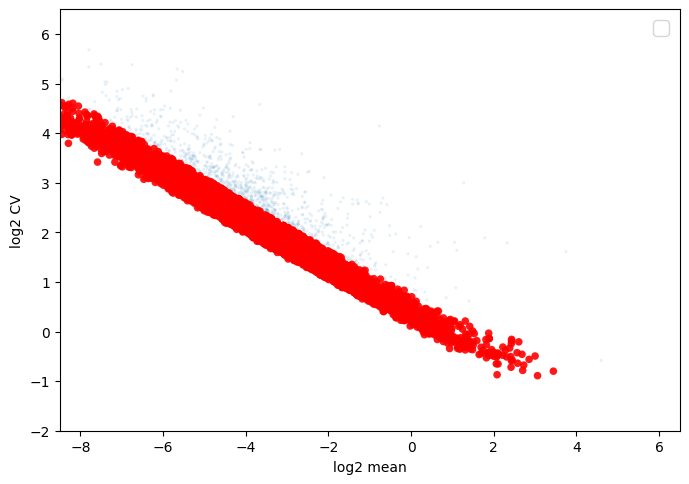

In [21]:
scref, score,  thrs, ax=scm.CamelPrefiltering.MVgenes(datax=scref,wt=3, markerlist=markerlist2,
                                                  plotfig=True, Xlow=-8.5, Xhigh=6.5, Ylow=-2, Yhigh=6.5,alphaValue=0.9, sValue=30,
           fig_args={'figsize': (8, 8), 'facecolor': 'white', 'edgecolor': 'white'})

In [22]:
len(scref.var.index[scref.var["MVgene"]])

2826

In [23]:
scref2=scref

In [24]:
########################################################
########################################################
#remeber to change the file path in tftable
########################################################
########################################################
scref =scm.CamelPrefiltering.MVgene_Scaling(datax=scref2,score=score,
                                                                   thrs=thrs, TPTT=0,     mprotogruop=scref.obs["Cluster"].values,commongene=None,
                                                                                              sharedMVgenes=None,std_scaling=True,
    tftable="/mnt/f/Dropbox/data/proj/PE_HYZ/PublicDataSet/FantomTF2CLUSTER_human_official.txt", learninggroup="train")



CamelRunning---GenesScaling......


/home/huyiz/anaconda3/envs/newpy38/lib/python3.8/site-packages/scCAMEL/CamelPrefiltering.py:791: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  scalepfc = dfpfc.div(dfpfc.std(1), axis=0).dropna(0)
/home/huyiz/anaconda3/envs/newpy38/lib/python3.8/site-packages/scCAMEL/CamelPrefiltering.py:792: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  scalepfc = dfpfc.astype(float).dropna(0)
/home/huyiz/anaconda3/envs/newpy38/lib/python3.8/site-packages/scCAMEL/CamelPrefiltering.py:794: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  scalepfc = scalepfc.dropna(0)
/home/huyiz/anaconda3/envs/newpy38/lib/python3.8/site-packages/scCAMEL/CamelPrefiltering.py:795: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  dfpfc_dev = scalepfc.loc[set(scalepfc.index) & set(sharedMVgenes

CamelRunning---TrainingGenesScaling......Finished


In [25]:
scref

AnnData object with n_obs × n_vars = 5454 × 12515
    obs: 'Cluster', 'Color', 'mtrain_index'
    var: 'Filter1', 'MVgene', 'RefGeneList'
    uns: 'train_set_gene', 'mclasses_names'
    obsm: 'train_set_values'

## Neural-Network learning

In [26]:
net=scm.CamelPrefiltering.NNclassifer(
   datax=scref,
    epochNum=100,
    learningRate=0.05,
    verbose=0,
    optimizerMmentum=0.8,
    dropout=0.3,
    #imizer__nesterov=True,
    )

CamelRunning---NNclasffier_in_cpu.......
CamelRunning---NNclasffier_in_cpu.......Finished


## Accuracy plot, the overall clustering accuracy is ~95%

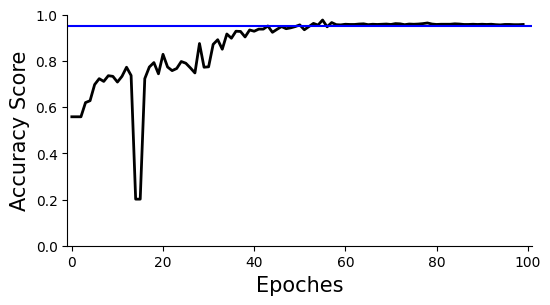

In [27]:
ax=scm.CamelPrefiltering.AccuracyPlot( nnModel=net, accCutoff=0.95,
                 Xlow=-1, Ylow=0.0, Yhigh=1,
               )

## Make predition and visualization in Radar plot

In [91]:
net=scm.CamelPrefiltering.NNclassifer(
   datax=scref,
    epochNum=60,
    learningRate=0.05,
    verbose=0,
    optimizerMmentum=0.8,
    dropout=0.3,
    #imizer__nesterov=True,
    )

CamelRunning---NNclasffier_in_cpu.......
CamelRunning---NNclasffier_in_cpu.......Finished


In [92]:
scref

AnnData object with n_obs × n_vars = 5454 × 12515
    obs: 'Cluster', 'Color', 'mtrain_index'
    var: 'Filter1', 'MVgene', 'RefGeneList'
    uns: 'train_set_gene', 'mclasses_names', 'mwanted_order', 'Celltype_Score_RefCellType', 'Celltype_OrderNumber', 'refcolor_dict'
    obsm: 'train_set_values', 'Celltype_Score', 'CelltypeScoreCoordinates'

In [93]:
#if color is not defined: scref.obs[ 'color']
#scref=scm.CamelSwapline.addcolor(datax=scref,clustername="Cluster", colorcode="color")

In [94]:
#scref.uns["mwanted_order"] =list(sort(list(set(scref.obs["Cluster"]))))
scref.uns["mwanted_order"] =[
 'Mossy', 'Cajal-Retzius', 'Cck-Tox', 'GABA',  'Endo',           
 'Peri/VLMC', 'PVM', 'Microglia', 'Astrocytes', 'OLIG',
 'NFOL', 'OPC', 'nIPC/Rgl','Neuroblast','Granule'
]


In [95]:
scref.uns["refcolor_dict"]= pd.Series({'Astrocytes':   (190,  10,  10),'Cajal-Retzius': (225, 160,  30),'Cck-Tox':    (217, 215,   7),
             'Endo':    (170, 180, 170), 'GABA':   (130, 140, 140),'Granule':    (180, 140, 130),
             'Microglia':  (100, 100, 240),'Mossy': ( 80, 235, 255),'NFOL':(190, 235, 255),
              'Neuroblast':(210, 255, 215),'OLIG':(230, 140, 120), 'OPC':  (255, 195,  28),
              'PVM':  (139, 101, 100),'Pericytes':  (252, 183,  26),'Radial Glia-like':   (214, 194,  39),
              'VLMC':  (255, 120, 155),'nIPC': (250, 145,  45),'hRgl2a':  (250, 125,  25),
              'hDA0':    (190, 200, 190),'hOPC':   (255,  35, 155),'hRN':     (199, 121,  41),
              'hNbGaba': ( 40,  55, 130),'hGaba':  (  7,  121, 61),'hOMTN':   ( 95, 186,  70),
              'hSert':   ( 50, 180, 180),'nIPC/Rgl':   (245, 205, 170), 'Peri/VLMC':   (185, 245, 30),
              'eSCc':(205,205,220)})

In [96]:
cd .

/mnt/f/Yizhou_KI_OneCloud/OneDrive - Karolinska Institutet/Datasets_Template/AdultBrain


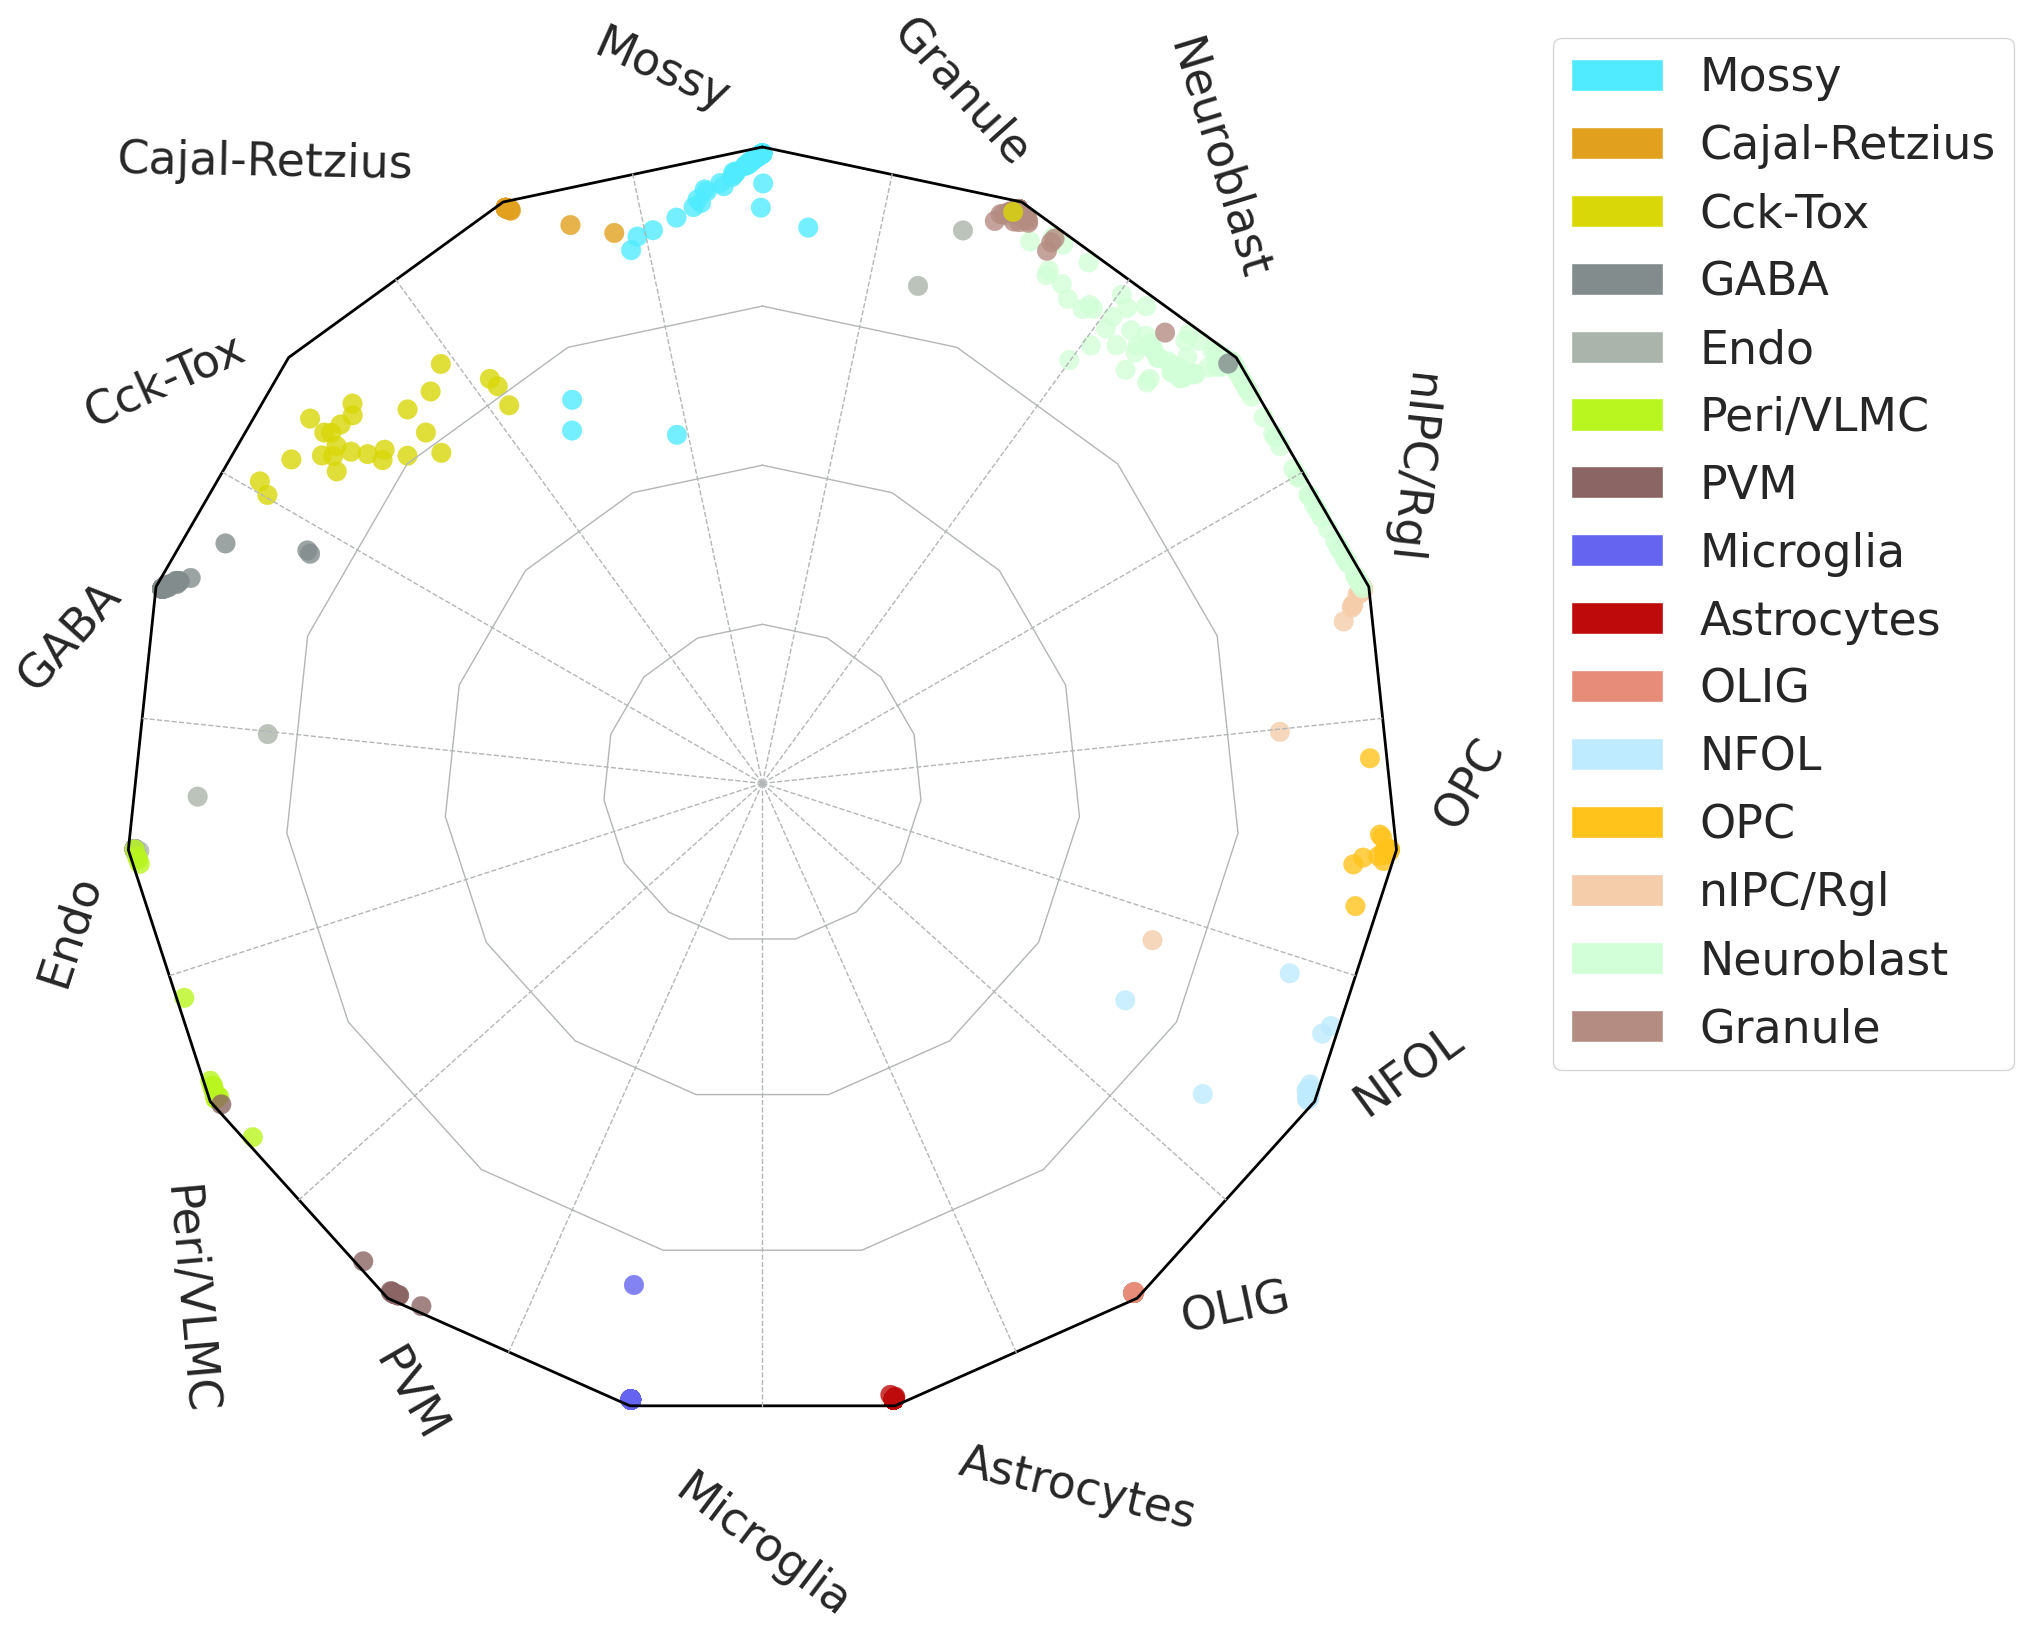

In [97]:
#radar  plot 
scref=scm.CamelSwapline.prediction(datax=scref, mcolor_dict=scref.uns["refcolor_dict"] ,net=net,learninggroup="train", radarplot=True,fontsizeValue=18,
                       ncolnm=3, bbValue=(1.2, 1.05)  )
#plt.savefig("upload_%s_RadarPlot_cluster.pdf"%today,bbox_inches='tight')

In [99]:
#######################
#######################
#Multiplot_Violin
# each column along X axis represents a cell type, and the y-axis represents the cell-type probability
# each column along X axis contain all cells in the training, shown as dots with different colors
# in the perfect condition， only the cells of the same cell-type column will reach to the maxium (100%) probability, all other cells will be 0 probability
#however, in each cell-type column, some cells from other cell types may exhibit high probability, two reasons: 1. they may shared some features with this---
# cell-type, and these features drag them to the current cell-type; 2. they are inproperly classified due to many factors, such as low quality data, different clustering algorithm..... 
#######################
#######################

<Figure size 2500x1000 with 0 Axes>

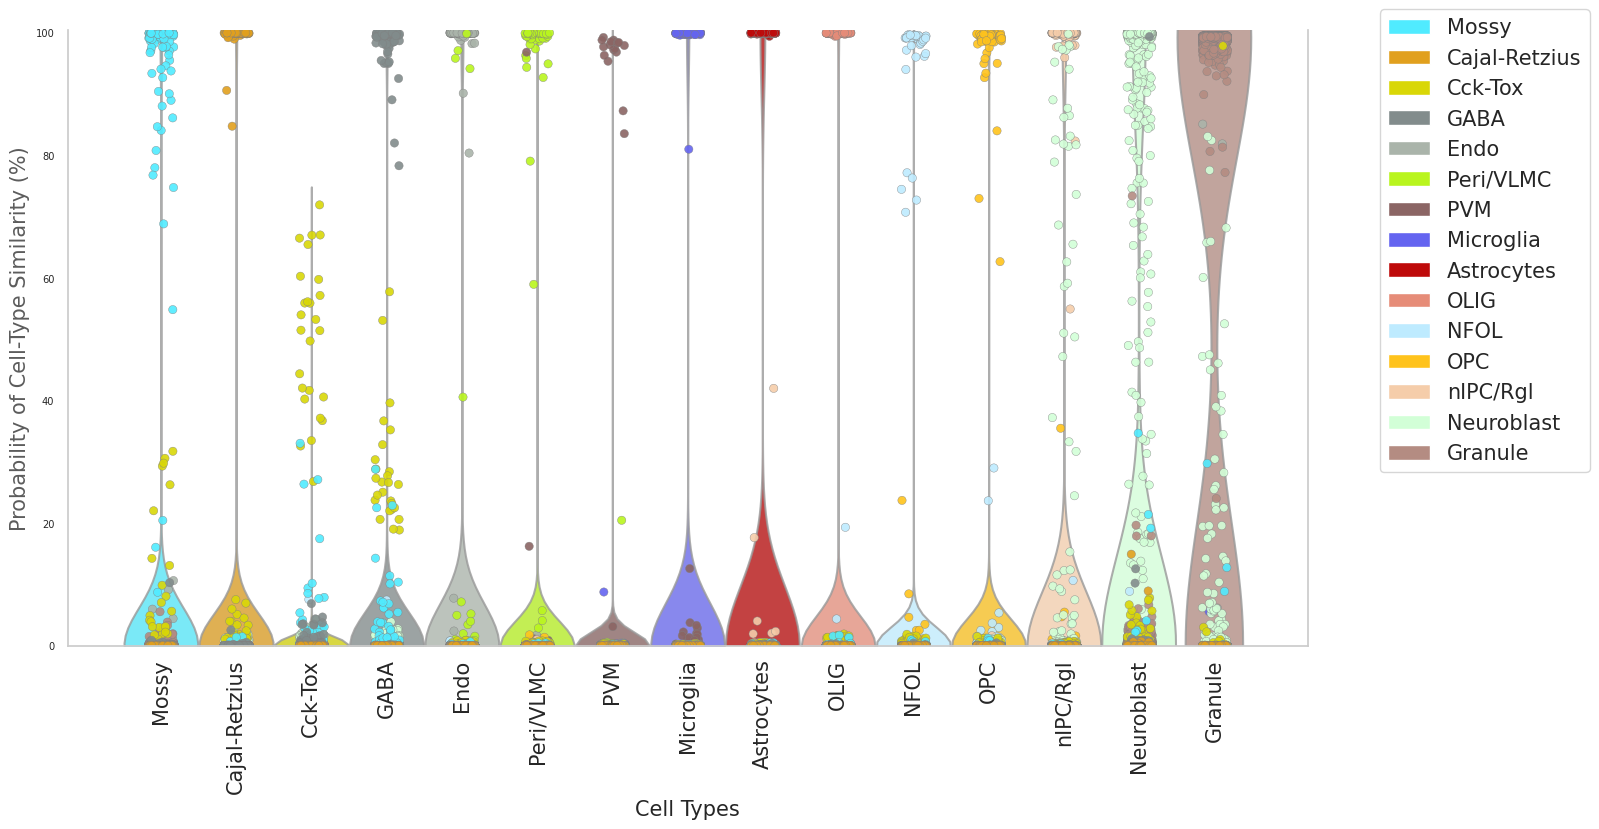

In [100]:
fig=scm.CamelSwapline.ProbMultiPlot( datax=scref, mcolor_dict=scref.uns["refcolor_dict"] )

## permutation control

In [101]:
## the whole data matrix is randomized, the red X represents 95% conficence of each cell-type

<Figure size 640x480 with 0 Axes>

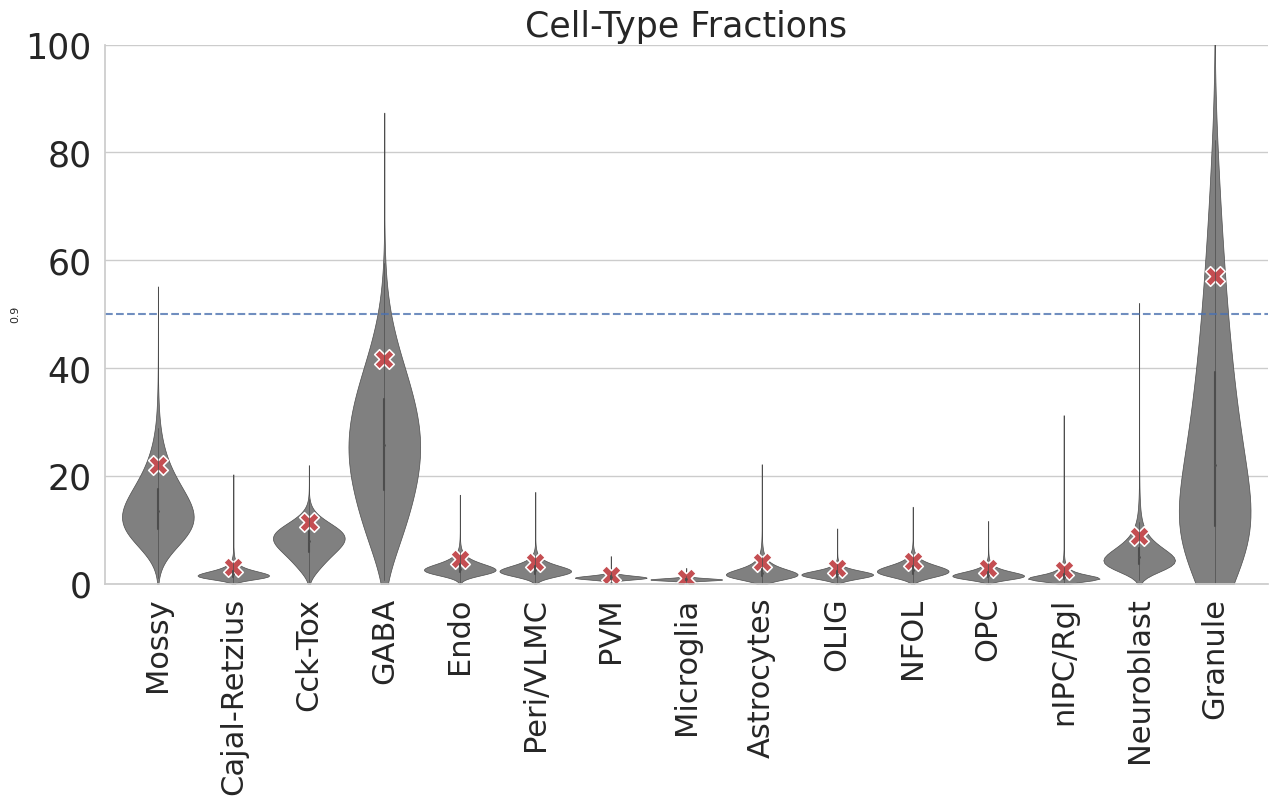

In [102]:
dftest0, ratiodf=scm.CamelSwapline.permutationTest(datax=scref,net=net,num=50, plotshow=True)

## Cell_Type Purity

In [103]:
#The ratio of the purity entropy for each cluster based on their learning scores, is used as a measure of purity.
#The function returns a pandas dataframe sorted by the purity score

<Figure size 640x480 with 0 Axes>

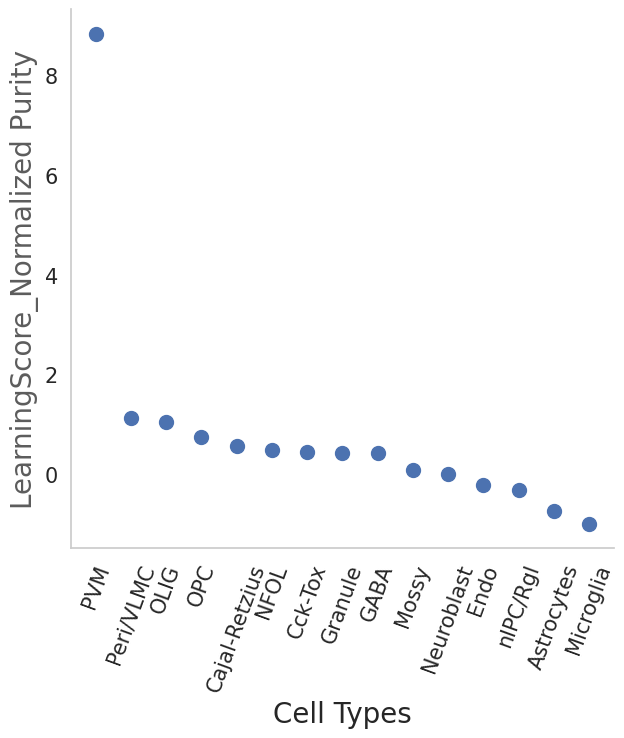

In [104]:
dfpurity1=scm.CamelSwapline.PurityEstimationLearningScore(datax=scref, clusterlist="Cluster",   elbow=False, figureplot=True)

## association between cell-types

In [105]:
scref

AnnData object with n_obs × n_vars = 5454 × 12515
    obs: 'Cluster', 'Color', 'mtrain_index'
    var: 'Filter1', 'MVgene', 'RefGeneList'
    uns: 'train_set_gene', 'mclasses_names', 'mwanted_order', 'Celltype_Score_RefCellType', 'Celltype_OrderNumber', 'refcolor_dict'
    obsm: 'train_set_values', 'Celltype_Score', 'CelltypeScoreCoordinates'

In [106]:
# the heatmap of hierarchical clustering represents the cell-type similarity or association
#color from dark purple to light yellow represents the association from low to high
#number inside of eahc square indicating the association value.

<Figure size 1500x1500 with 0 Axes>

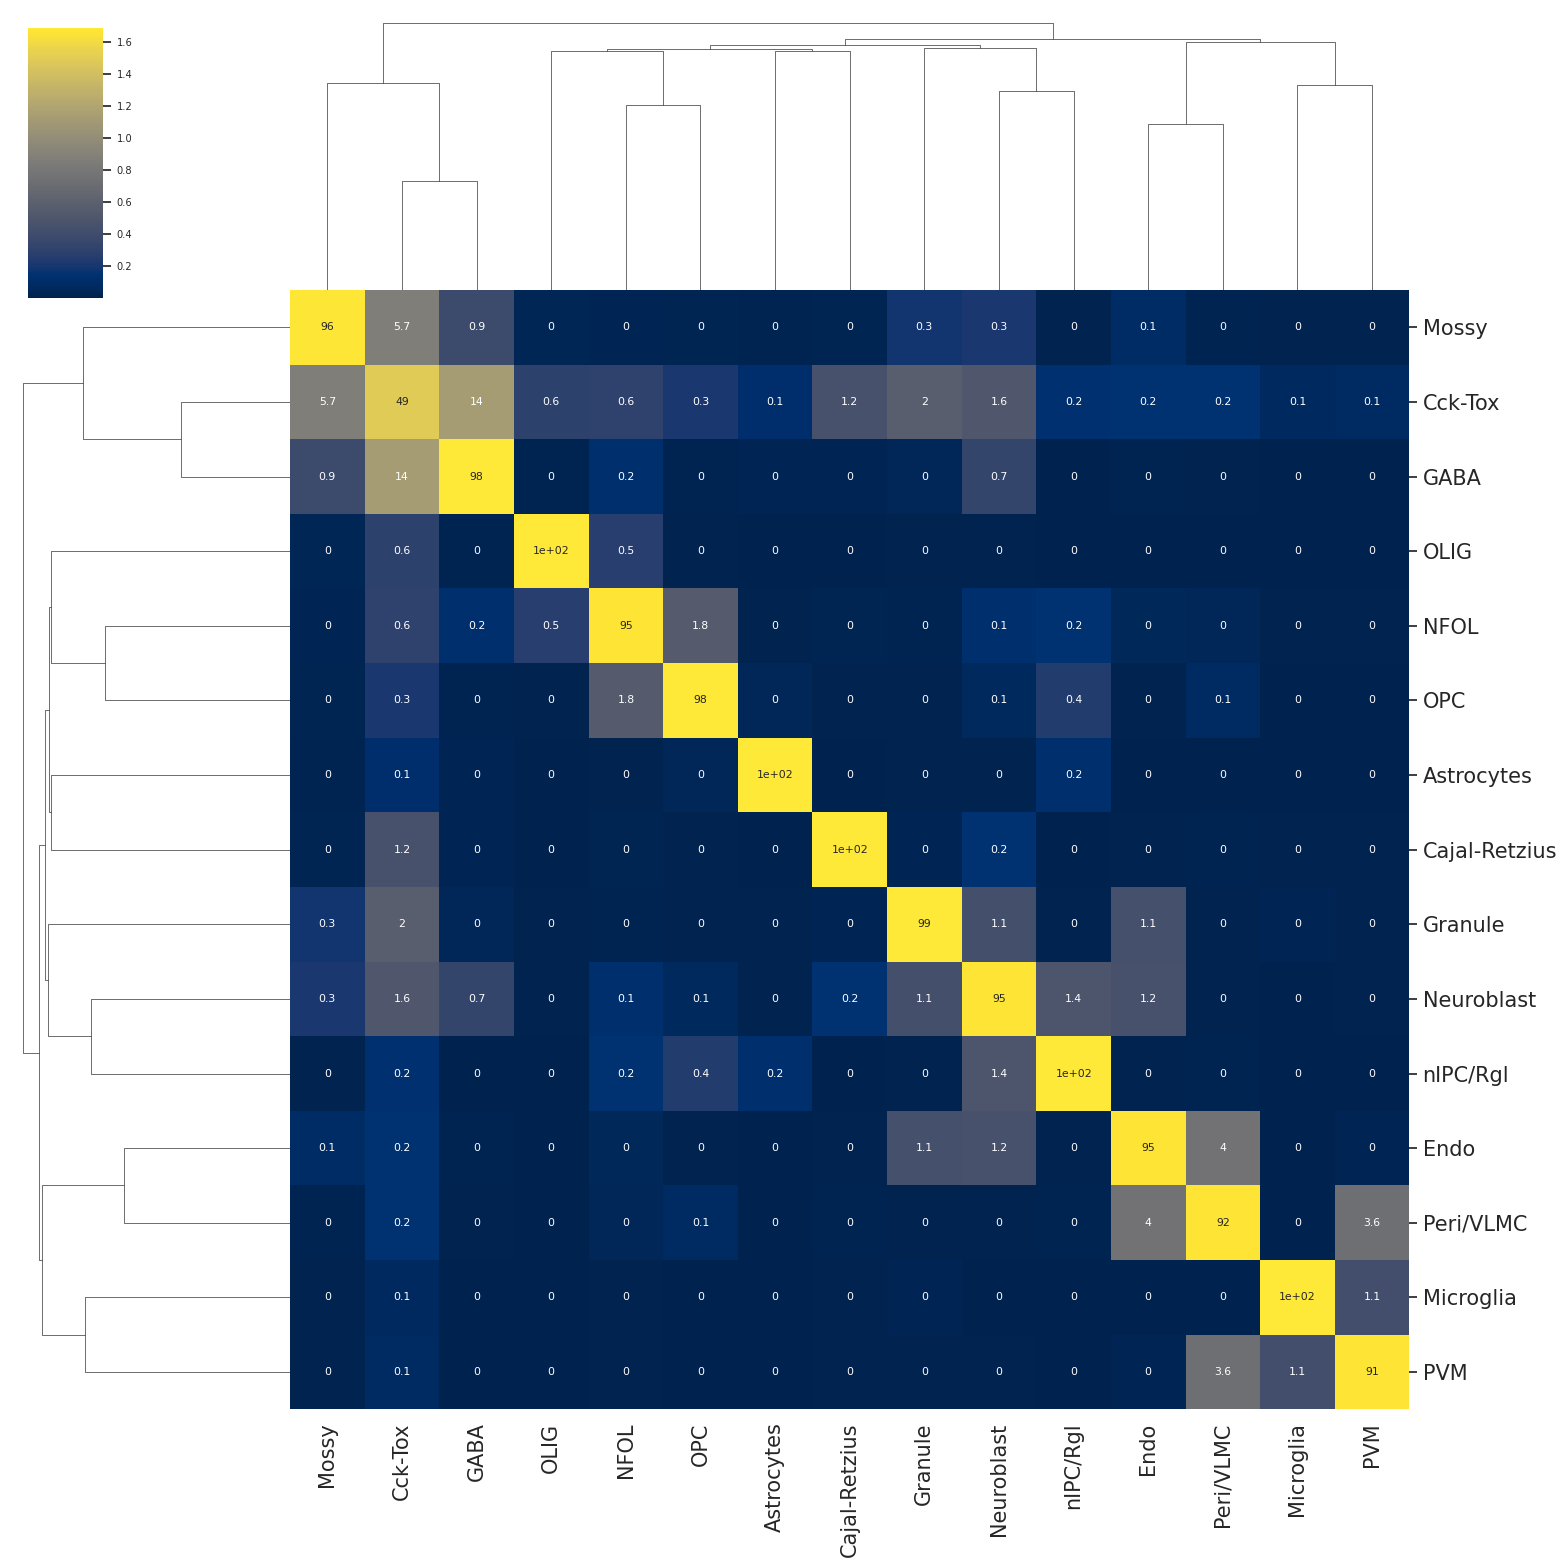

In [107]:
scm.CamelSwapline.CellTypeSimilarity(datax=scref, labelnum=True,  metricvalue='correlation',methodvalue="complete")

<Figure size 1500x1500 with 0 Axes>

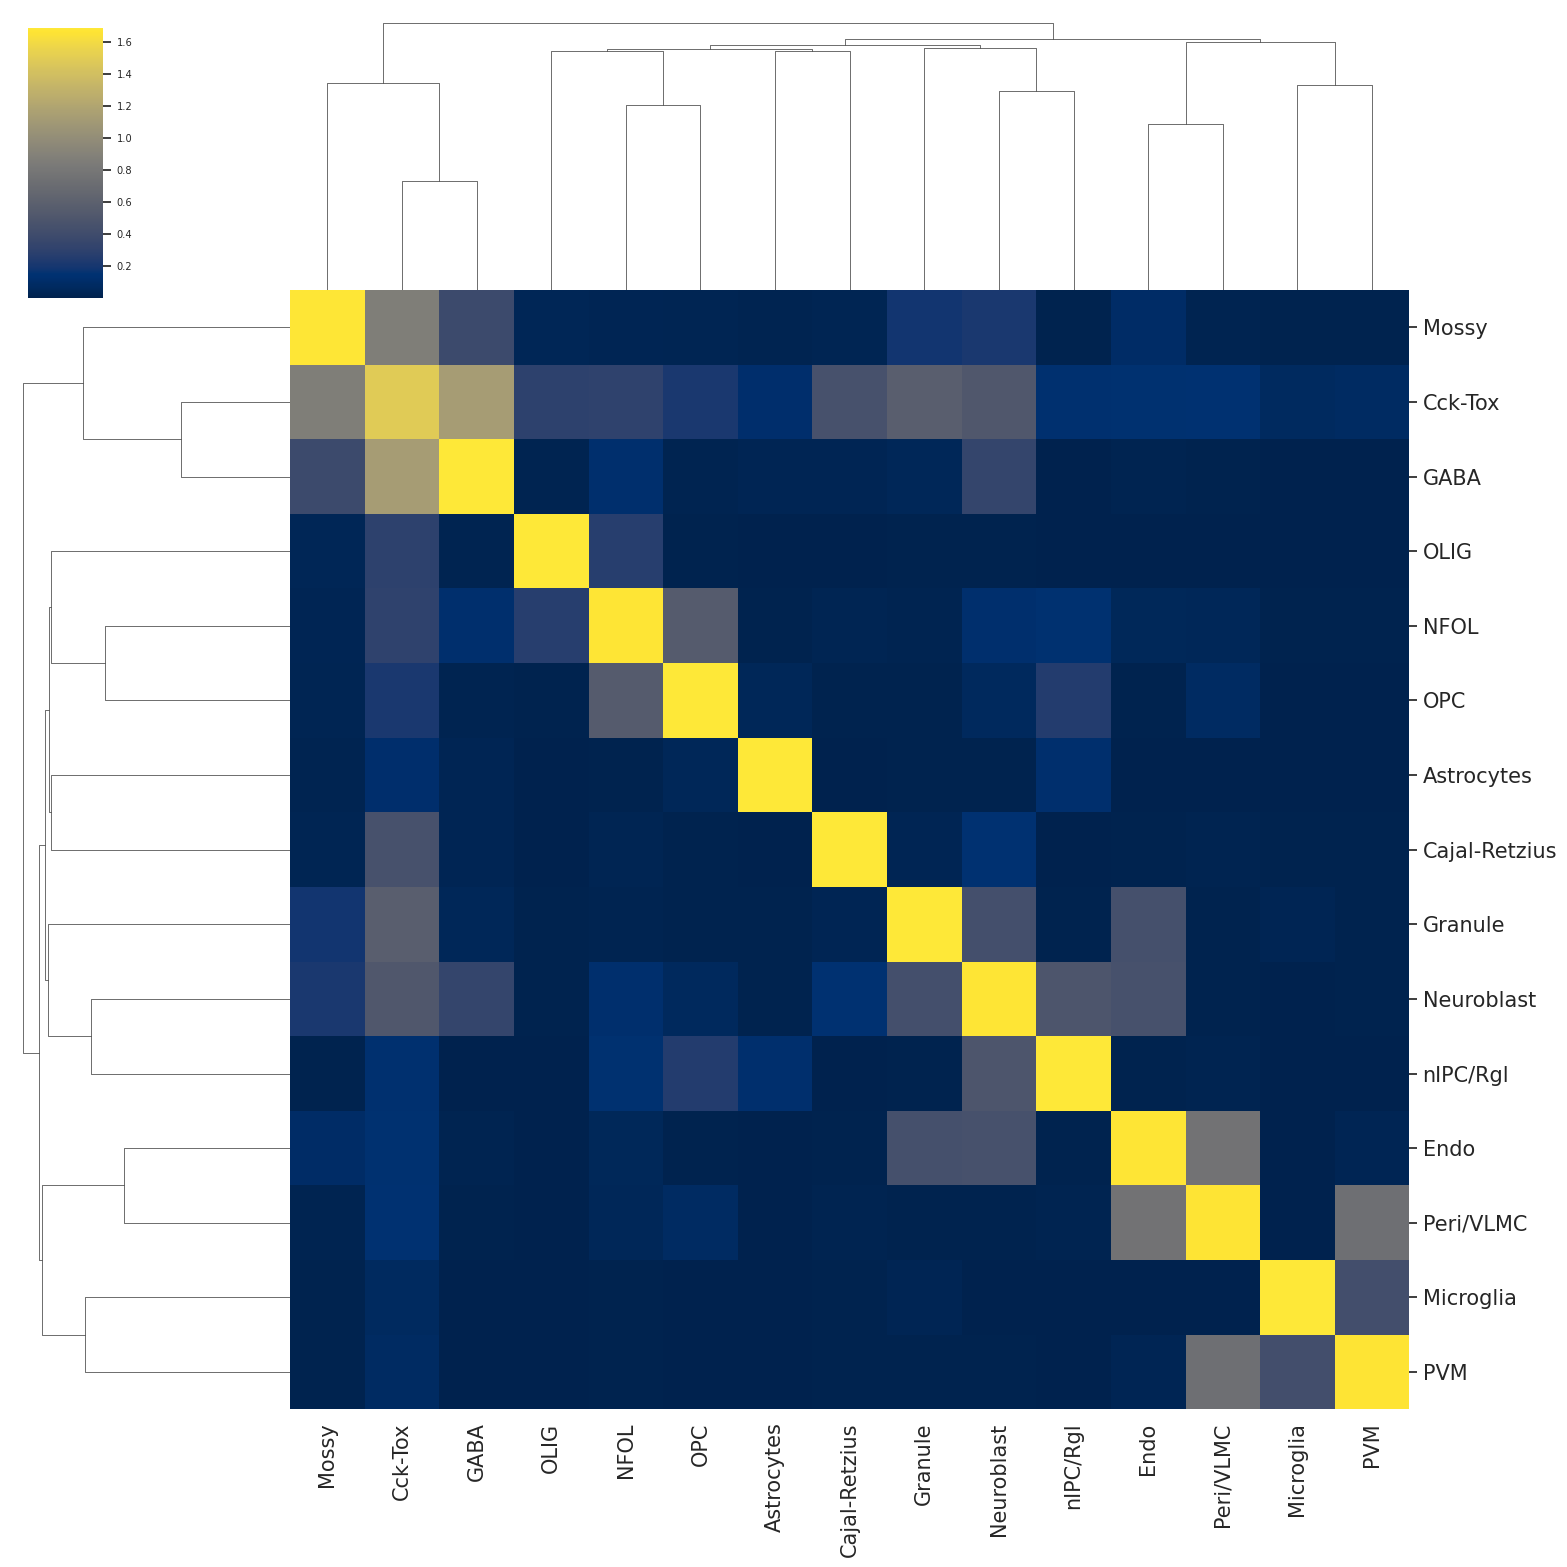

In [108]:
scm.CamelSwapline.CellTypeSimilarity(datax=scref, labelnum=False,  metricvalue='correlation',methodvalue="complete")

## Save data

In [109]:
scref

AnnData object with n_obs × n_vars = 5454 × 12515
    obs: 'Cluster', 'Color', 'mtrain_index'
    var: 'Filter1', 'MVgene', 'RefGeneList'
    uns: 'train_set_gene', 'mclasses_names', 'mwanted_order', 'Celltype_Score_RefCellType', 'Celltype_OrderNumber', 'refcolor_dict'
    obsm: 'train_set_values', 'Celltype_Score', 'CelltypeScoreCoordinates'

In [110]:
cd .

/mnt/f/Yizhou_KI_OneCloud/OneDrive - Karolinska Institutet/Datasets_Template/AdultBrain


In [111]:
work_dir="/mnt/f/Yizhou_KI_OneCloud/OneDrive - Karolinska Institutet/Datasets_Template/AdultBrain"
QueryName="ZeiselMouseDG"
TrainingName="ZeiselMouseDG"
filename="%s_%s_Ref%s_MergeCluster.h5ad"%(QueryName,TrainingName,today)

In [112]:
os.path.join(work_dir,filename)

'/mnt/f/Yizhou_KI_OneCloud/OneDrive - Karolinska Institutet/Datasets_Template/AdultBrain/ZeiselMouseDG_ZeiselMouseDG_Ref2023-05-29_MergeCluster.h5ad'

In [113]:
del scref.uns['refcolor_dict']

In [114]:
CamelSwapline.writedata(adatax=scref,filename=filename,filepath=work_dir)

In [115]:
scref.X=scref.X.todense()

In [116]:
scref.uns["refcolor_dict"]= pd.Series({'Astrocytes':   (190,  10,  10),'Cajal-Retzius': (225, 160,  30),'Cck-Tox':    (217, 215,   7),
             'Endo':    (170, 180, 170), 'GABA':   (130, 140, 140),'Granule':    (180, 140, 130),
             'Microglia':  (100, 100, 240),'Mossy': ( 80, 235, 255),'NFOL':(190, 235, 255),
              'Neuroblast':(210, 255, 215),'OLIG':(230, 140, 120), 'OPC':  (255, 195,  28),
              'PVM':  (139, 101, 100),'Pericytes':  (252, 183,  26),'Radial Glia-like':   (214, 194,  39),
              'VLMC':  (255, 120, 155),'nIPC': (250, 145,  45),'hRgl2a':  (250, 125,  25),
              'hDA0':    (190, 200, 190),'hOPC':   (255,  35, 155),'hRN':     (199, 121,  41),
              'hNbGaba': ( 40,  55, 130),'hGaba':  (  7,  121, 61),'hOMTN':   ( 95, 186,  70),
              'hSert':   ( 50, 180, 180),'nIPC/Rgl':   (245, 205, 170), 'Peri/VLMC':   (185, 245, 30),
              'eSCc':(205,205,220)})

## Prediction

## Couturier2020_humanGlioblastoma

In [118]:
scpdt=anndata.read("Couturier2020_DevGBM_Ref2023-05-27.h5ad")

In [119]:
set(scpdt.obs["Cluster"])

{'Astro', 'Mesenchymal', 'Neuronal', 'Oligo', 'Progenitor', 'Unassigned'}

In [120]:
scpdt

AnnData object with n_obs × n_vars = 18475 × 33660
    obs: 'Patient', 'Cluster', 'Color'

In [121]:
scpdt.var.index

Index(['A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1', 'A2ML1', 'A2ML1-AS1',
       'A2ML1-AS2', 'A3GALT2', 'A4GALT',
       ...
       'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX', 'ZZEF1', 'ZZZ3', 'bP-21264C1.2',
       'bP-2171C21.3', 'bP-2189O9.3', 'hsa-mir-1253'],
      dtype='object', length=33660)

In [122]:
scpdt.X=scpdt.X.todense()

In [123]:
scpdt2=scpdt.copy()
scpdt2=scm.CamelPrefiltering.DataScaling(scpdt2)

In [126]:
########################################################
########################################################
#remeber to change the file path in tftable
########################################################
########################################################
scpdt =scm.CamelPrefiltering.MVgene_Scaling(datax=scpdt2,TPTT=0,   commongene=scref.var.index.tolist(),  
                                        sharedMVgenes=scref.uns[ 'train_set_gene'].tolist(),
                                                                                            std_scaling=True,score=None, thrs=None,  mprotogruop=None,
    tftable="/mnt/f/Dropbox/data/proj/PE_HYZ/PublicDataSet/FantomTF2CLUSTER_human_official.txt", learninggroup="test")



CamelRunning---GenesScaling......


/home/huyiz/anaconda3/envs/newpy38/lib/python3.8/site-packages/scCAMEL/CamelPrefiltering.py:820: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  scalegbm = dfpfc.div(dfpfc.std(1), axis=0).dropna(0)


CamelRunning---TestGenesScaling......Finished


In [127]:
scpdt

AnnData object with n_obs × n_vars = 18475 × 33660
    obs: 'Patient', 'Cluster', 'Color', 'mtrain_index'
    var: 'RefGeneList'
    uns: 'train_set_gene', 'mclasses_names'
    obsm: 'test_set_values'

In [128]:
#del scpdt.obs["color"]

In [129]:
# if color is not definedi
#scpdt=scm.CamelSwapline.addcolor(datax=scpdt,clustername="Cluster", colorcode="color")

In [130]:
scpdt.uns["mwanted_order"] =list(sort(list(set(scpdt.obs["Cluster"]))))

In [131]:
scpdt.uns["refcolor_dict"] = pd.Series({'Astro':  (100, 100, 240), 'Neuronal':   ( 0, 86,  255),
              'Mesenchymal':  (55, 120, 55), 'Oligo': ( 255,185, 5), 'Unassigned':  (192,192,192),
             'Progenitor':    (190, 0, 0)})

In [133]:
scpdt

AnnData object with n_obs × n_vars = 18475 × 33660
    obs: 'Patient', 'Cluster', 'Color', 'mtrain_index'
    var: 'RefGeneList'
    uns: 'train_set_gene', 'mclasses_names', 'mwanted_order', 'refcolor_dict'
    obsm: 'test_set_values'

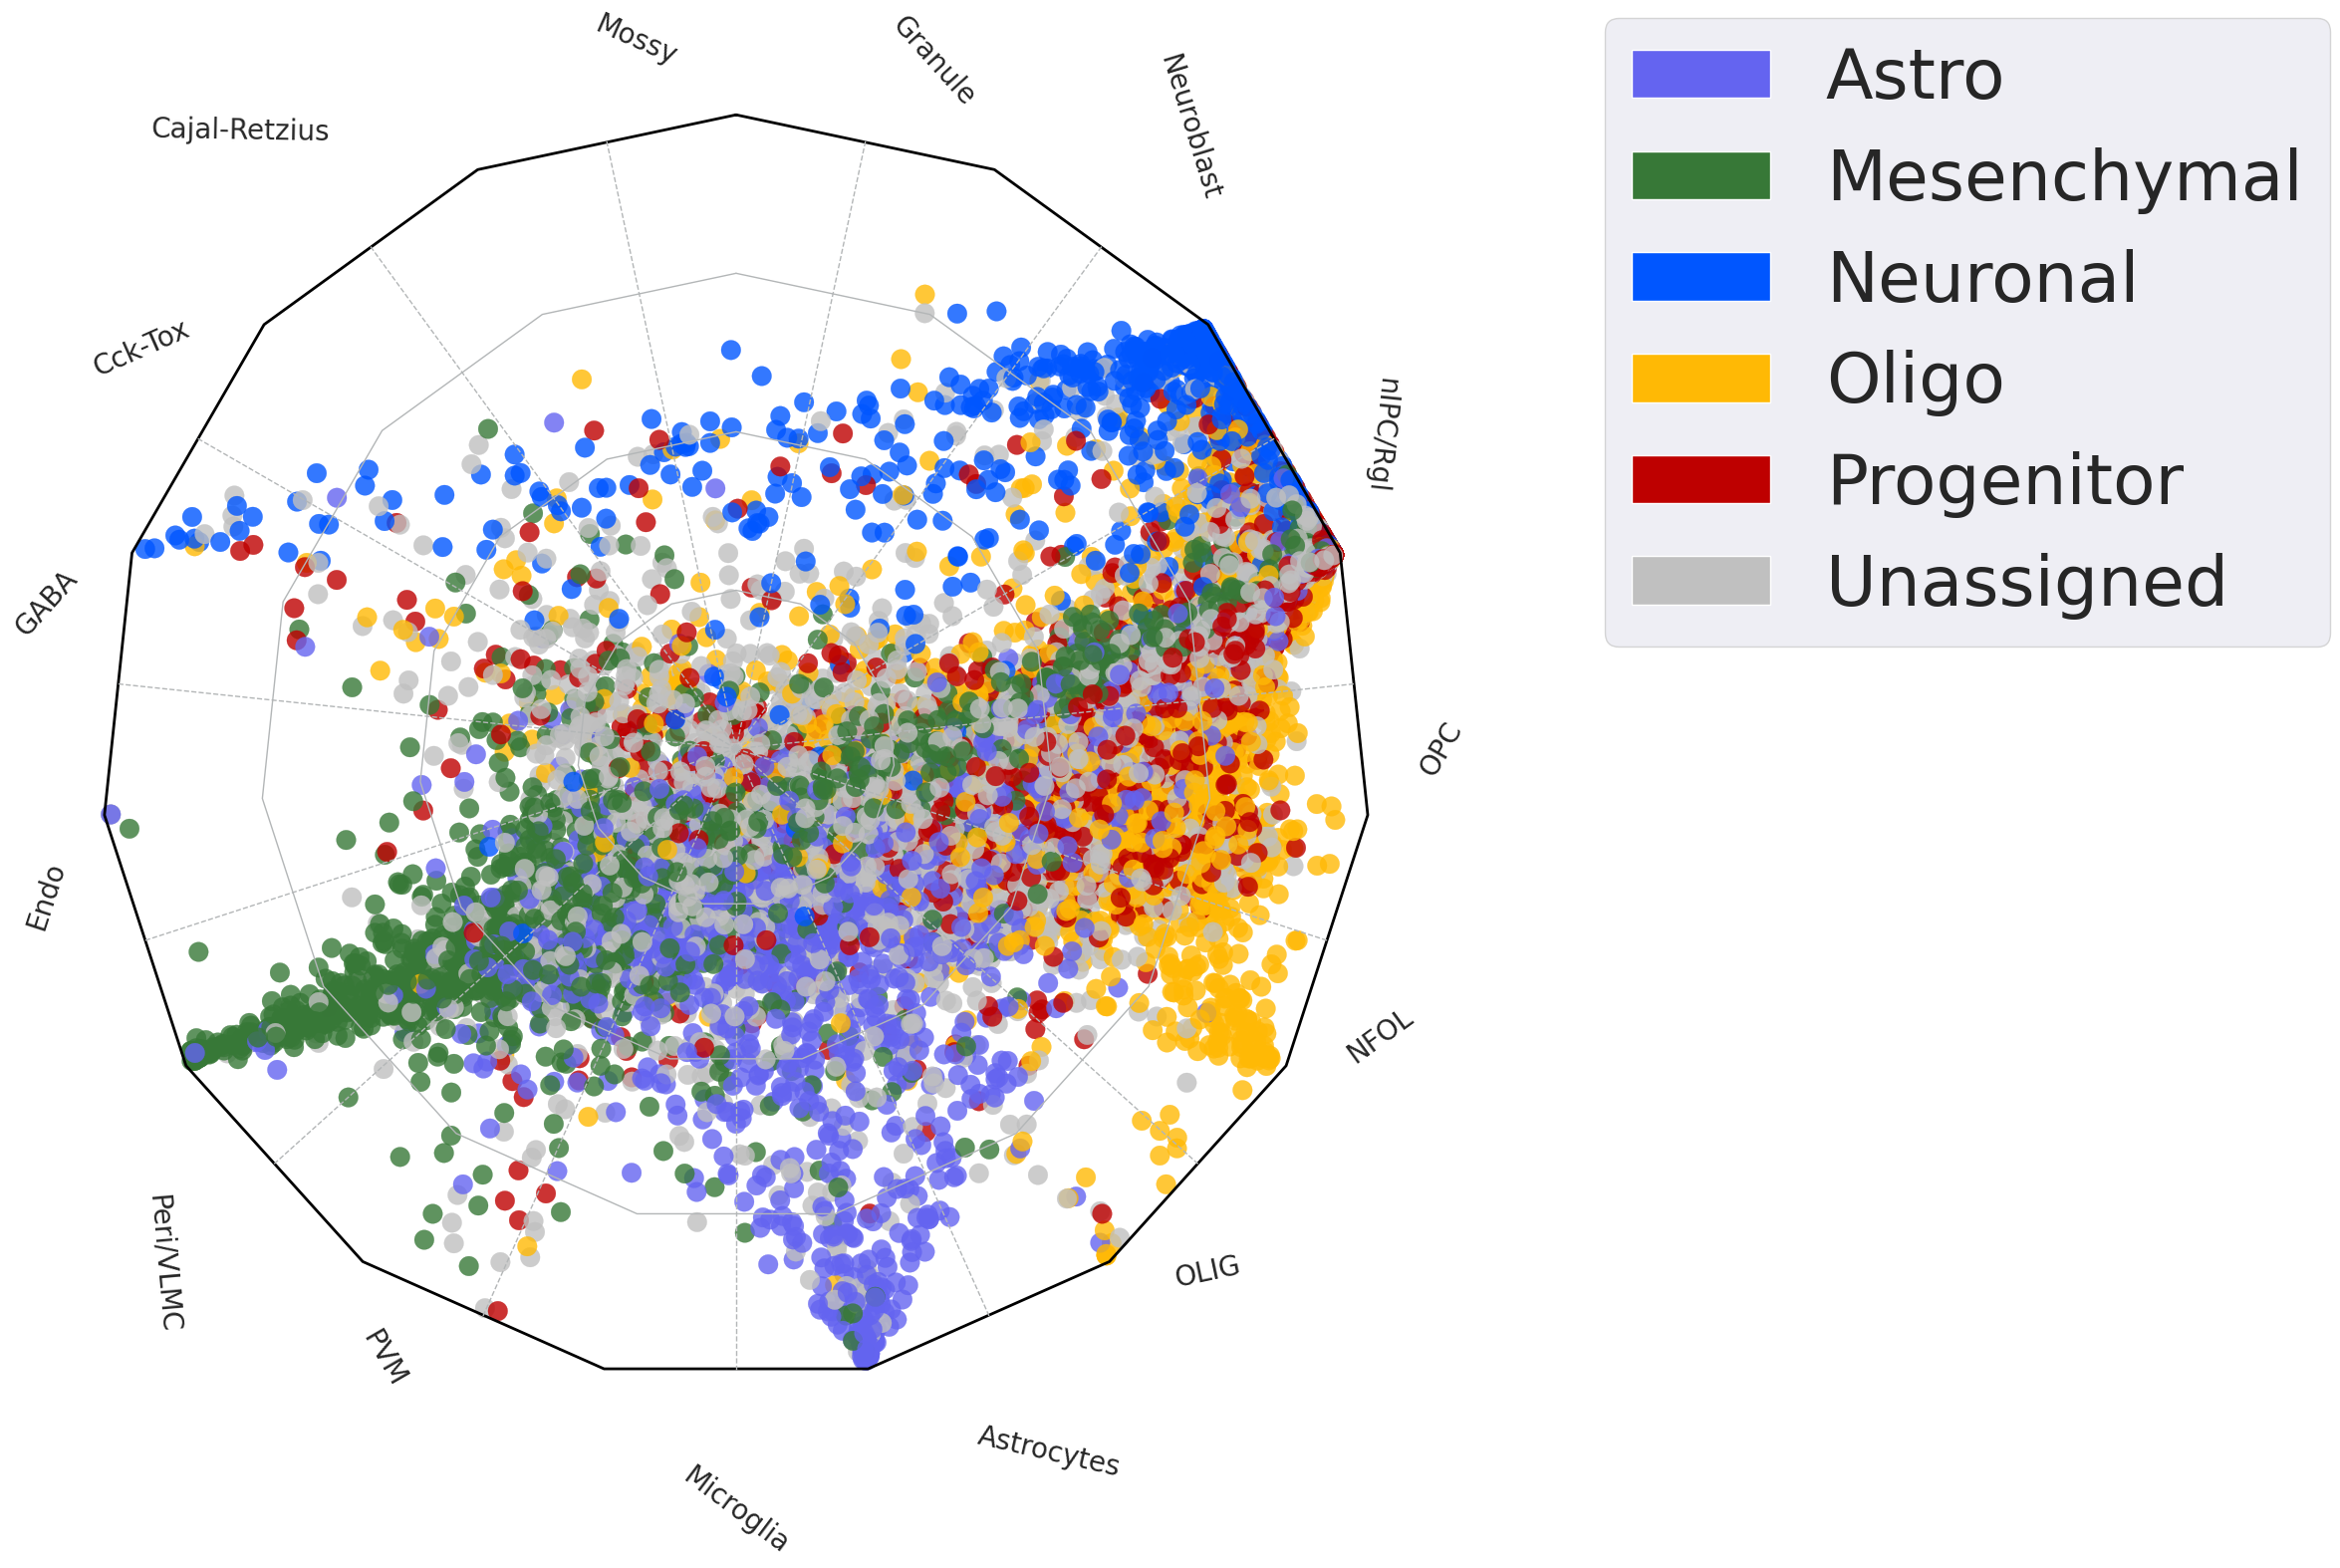

In [134]:
test=scm.CamelSwapline.prediction(datax=scpdt, mcolor_dict=scpdt.uns["refcolor_dict"],net=net,learninggroup="test", radarplot=True, fontsizeValue=35,
              datarefplot=scref,               ncolnm=1, bbValue=(1.1, 1.05))

In [139]:
scpdt

AnnData object with n_obs × n_vars = 18475 × 33660
    obs: 'Patient', 'Cluster', 'Color', 'mtrain_index'
    var: 'RefGeneList'
    uns: 'train_set_gene', 'mclasses_names', 'mwanted_order', 'refcolor_dict', 'Celltype_Score_RefCellType', 'Celltype_OrderNumber'
    obsm: 'test_set_values', 'Celltype_Score', 'CelltypeScoreCoordinates'

In [140]:
genename=sort(list(set(scpdt.obs["Cluster"])))
name=sort(list(set(scref.obs["Cluster"])))

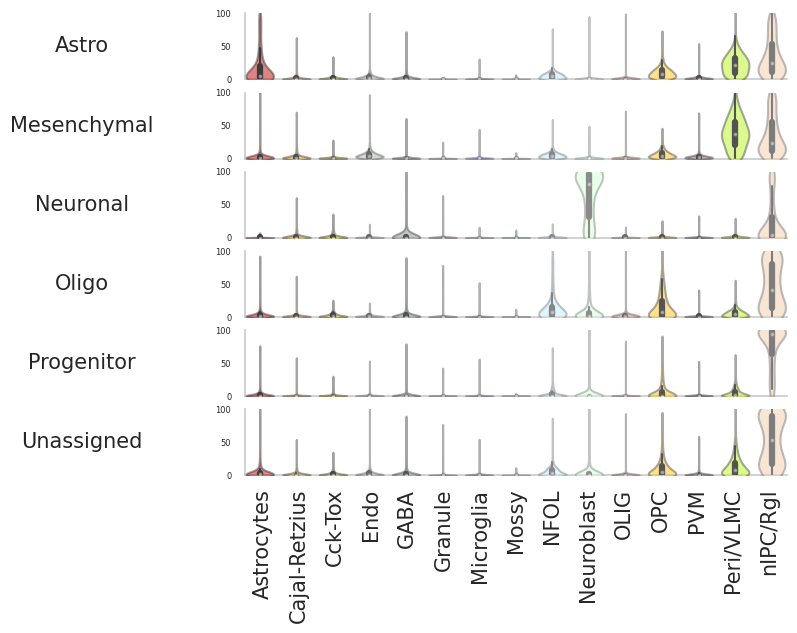

In [141]:
dfprob=pd.DataFrame(scpdt.obsm['Celltype_Score'])
dfprob.columns=scpdt.uns['Celltype_Score_RefCellType']
dfprob.index=scpdt.obs.index
dfmk=dfprob.astype(float).join(scpdt.obs["Cluster"],how="inner").T
dfprob=scm.CamelSwapline.CellTypeSimilarityViolinPlot(datax=scpdt, dataref=scref)

##  Save data

In [142]:
cd .

/mnt/f/Yizhou_KI_OneCloud/OneDrive - Karolinska Institutet/Datasets_Template/AdultBrain


In [143]:
scpdt

AnnData object with n_obs × n_vars = 18475 × 33660
    obs: 'Patient', 'Cluster', 'Color', 'mtrain_index'
    var: 'RefGeneList'
    uns: 'train_set_gene', 'mclasses_names', 'mwanted_order', 'refcolor_dict', 'Celltype_Score_RefCellType', 'Celltype_OrderNumber'
    obsm: 'test_set_values', 'Celltype_Score', 'CelltypeScoreCoordinates'

In [144]:
work_dir="/mnt/f/Yizhou_KI_OneCloud/OneDrive - Karolinska Institutet/Datasets_Template/AdultBrain"
QueryName="Couturier2020"
TrainingName="ZeiselMouseDG"
filename="%s_%s_Ref%s_MergeCluster.h5ad"%(QueryName,TrainingName,today)

In [145]:
os.path.join(work_dir,filename)

'/mnt/f/Yizhou_KI_OneCloud/OneDrive - Karolinska Institutet/Datasets_Template/AdultBrain/Couturier2020_ZeiselMouseDG_Ref2023-05-29_MergeCluster.h5ad'

In [147]:
del scpdt.uns["refcolor_dict"]

In [149]:
CamelSwapline.writedata(adatax=scpdt,filename=filename,filepath=work_dir)